In [ ]:
#https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)

In [ ]:
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

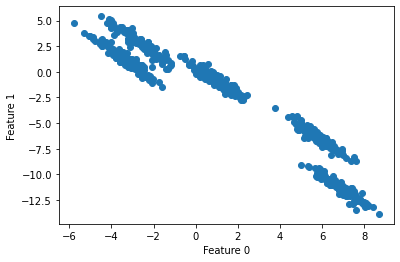

In [ ]:
# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [ ]:
# apply k-means
# cluster the data into five clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)

Text(0, 0.5, 'Feature 1')

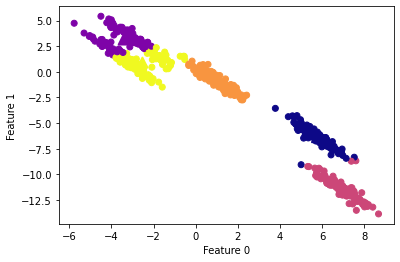

In [ ]:
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1, 2, 3, 4], 
            s=100, 
            linewidth=2,
            cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

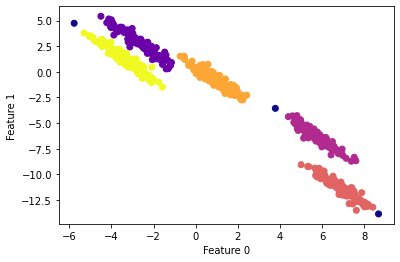

In [ ]:
# apply DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

[-1  0  1  2  3  4]


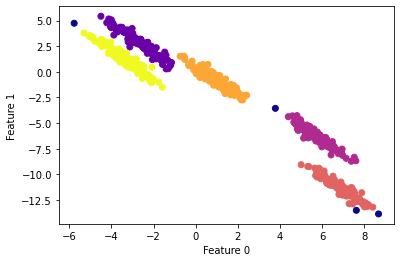

In [ ]:
# play around with eps
dbscan = DBSCAN(eps=0.1, min_samples = 2)

# 0.05, 0.1, 0.2
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print(np.unique(clusters))

Text(0, 0.5, 'Feature 1')

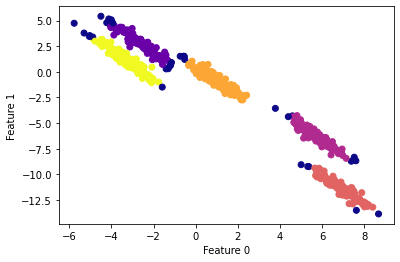

In [ ]:
# play around with min_samples
dbscan = DBSCAN(eps=0.1, min_samples = 10)
# 1, 2, 10
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
#k-means performance:
print("K-Means ARI =", adjusted_rand_score(y, y_pred))

#DBSCAN performance:
print("DBSCAN ARI =", adjusted_rand_score(y, clusters))

K-Means ARI = 0.7614628725094053
DBSCAN ARI = 0.9298536582510352
